In [3]:
import os
def get_data_filenames(directory):   
    
    # 获取所有文件名
    all_files = os.listdir(directory)
    
    data_files = [os.path.join(directory, file) for file in all_files if 'data' in file]

    return data_files

directory = 'Exercise-5-data'
print(len(get_data_filenames(directory)))



100


In [5]:
import numpy as np
class Algorithm:
    """
    TODO: Implement your algorithm in this class.
    """

    def __init__(
        self, lambda_1=10e-10, lambda_2=10e-5, lambda_3=10e-1,lambda_4=10e1
    ) -> None:
        

        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.lambda_3 = lambda_3
        self.lambda_4 = lambda_4
        """
        TODO
        """
 
        self.W: np.matrix = None

    def gaussion(self, x) -> float:
 
        phi = []
        for j in range (0,25):
            miu = 0.2*(j-12.5)
            if j == 0:
                phi.append(1)
            else:
                 phi.append(np.exp(-(x - miu)**2))
        return phi
    


    def train(self, point_pairs,lambda_param) -> None:
        """
        TODO: Calculate A, b, W here.
        point_pairs: (xi,yi)*100
        lambda : regularization parameter
        """
   
        x=np.asmatrix([row[0] for row in point_pairs]).T # N*1，行堆叠
        Y=np.asmatrix([row[1] for row in point_pairs]).T # N*1，行堆叠

        self.x=x

        N=x.shape[0]
        # print(x.shape,Y.shape)

        
        
        phx=np.asmatrix([self.gaussion(x_i.item(0)) for x_i in x]).T # N*25
        # print(phx.shape)

        E=np.diag((lambda_param*np.ones(25)))


        self.W=(phx.T@phx+E).I@phx.T@Y
  

        

    def predict(self, point_pairs) -> tuple:
        """
        TODO: 
        """
        x=np.asmatrix([row[0] for row in point_pairs]).T # N*1，行堆叠

        phx=np.asmatrix([self.gaussion(x_i.item(0)) for x_i in x]).T # N*25
        # print(xi.shape,phix.shape)

        y = phx@self.W # N*1
        # print(f'yi:{yi.shape}')
        # raise NotImplementedError  # You need to comment this line.

        
        return  y  # example return

import numpy as np
import matplotlib.pyplot as plt

# 假设这里是你已经读取的 point_pairs
files = get_data_filenames(directory)

In [ ]:

lambda_params = [10e-10, 10e-5, 10e-1, 10e1]
for file in files:
    
    point_pairs = np.loadtxt(file)
    algorithm = Algorithm()

    # 存储每个 lambda 参数的预测值
    predictions = []

    for lambda_param in lambda_params:
        algorithm.train(point_pairs, lambda_param)
        y = algorithm.predict(point_pairs)  # 获取预测值
        predictions.append(y[:25])

    # 绘图
    plt.figure(figsize=(12, 6))

    plt.plot(point_pairs[:25, 0], point_pairs[:25, 1], label='real-y', color='pink', marker='o')

    # 绘制输入值与不同λ的预测值
    for i, lambda_param in enumerate(lambda_params):
        plt.plot(point_pairs[:25, 0], predictions[i], label=f'Prediction (λ={lambda_param})')

    plt.title(f'{file}:Iput-Prediction')
    plt.xlabel('Inputs (x)')
    plt.ylabel('Prediction (y)')
    plt.legend()
    plt.grid()
    plt.show()




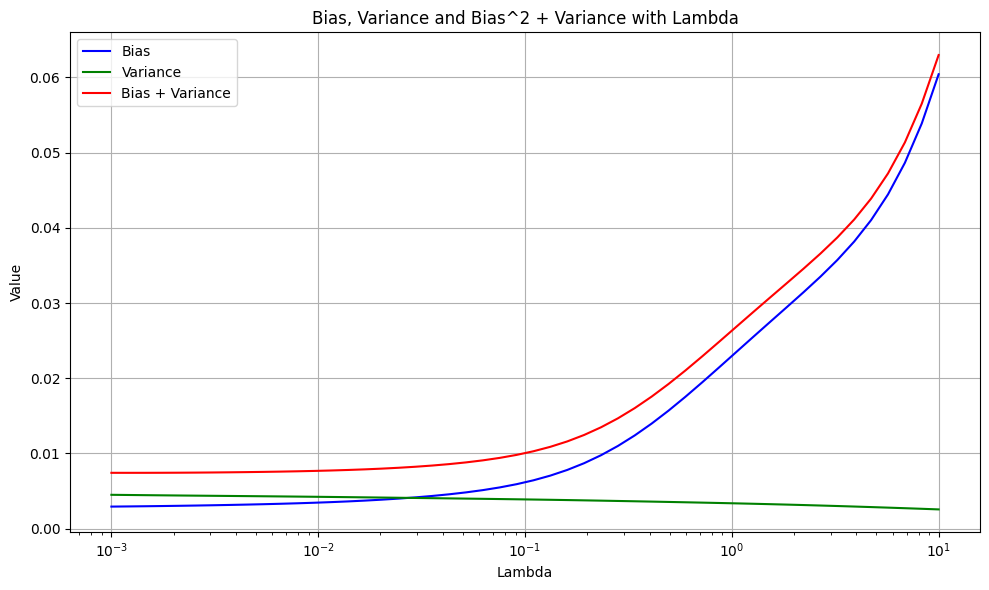

In [25]:
lambda_params = 10**(np.linspace(-3, 1))
bias = []
var = []
bias_and_var = []

for lambda_param in lambda_params:
    Y = []
    for file in files:
        
        point_pairs = np.loadtxt(file)
        algorithm = Algorithm()

        # 存储每个 lambda 参数的预测值
        predictions = []        
        algorithm.train(point_pairs, lambda_param)
        y = algorithm.predict(point_pairs)  # 获取预测值

        if len(Y) == 0:
            Y = y  # 第一次赋值
        else:
            Y = np.hstack((Y, y))  # 堆叠后续的预测值
        """
        得到一个矩阵包含全部数据集上的预测值25*100，一行是一个点的结果，一列是一个数据集的结果
        """

    # print(Y.shape)
    Y_aver = np.mean(Y, axis=1)   
    # print(Y_aver.shape) 
    #计算H
    point_pairs = np.loadtxt(file)
    H = np.sin(np.pi*point_pairs[:,0]).reshape(-1, 1)  # 转换为列向量

    # print(H.shape)

    biasi = ((H - Y_aver).T@(H - Y_aver)/len(H)).item()
    bias.append(biasi)

    vari = np.linalg.norm(Y- Y_aver, 'fro') /(Y.shape[0]*Y.shape[1])  #这里应该会自动广播吧
    var.append(vari)

    bias_and_var.append(biasi + vari)

plt.figure(figsize=(10, 6))

# 绘制偏差
plt.plot(lambda_params, bias, color='b', label='Bias')
# 绘制方差
plt.plot(lambda_params, var,  color='g', label='Variance')
# 绘制偏差和方差的和
plt.plot(lambda_params, bias_and_var, color='r', label='Bias + Variance')

# 设置 x 轴为对数刻度
plt.xscale('log')

# 添加标题和标签
plt.title('Bias, Variance and Bias^2 + Variance with Lambda')
plt.xlabel('Lambda')
plt.ylabel('Value')

# 显示图例
plt.legend()

# 添加网格
plt.grid(True)

# 显示图形
plt.tight_layout()
plt.show()

